# EDA

## **SETTING**
- import package
- PATH

In [174]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# 경로 설정
import os
os.chdir('/opt/ml/data')
os.getcwd()

'/opt/ml/data'

## **1:데이터 확인**
- train.csv 총 데이터 9324개
- dev_pd : 550개
- test_pd : 1100개
- null값 없음

In [176]:
train_pd = pd.read_csv("train.csv")
dev_pd = pd.read_csv("dev.csv")
test_pd = pd.read_csv("test.csv")

print(train_pd.info(),end='\n\n')
print(dev_pd.info(),end='\n\n')
print(test_pd.info(),end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non-null    float64
dtypes: float64(2), object(4)
memory usage

In [177]:
# train_pd.isnull().values.any()
# train_pd.isna().sum()

In [178]:
# print('Train Label: ', train_pd['label'].value_counts(), sep='\n', end='\n\n')

### **1-1 : LABEL 분포**

각 데이터별 Label 점수는 여러명의 사람이 위의 점수 기준을 토대로 평가한 두 문장간의 점수를 평균낸 값입니다. 두 문장간의 유사도는 사람마다 다르게 평가될 수 있다는 점을 고려하여 데이터를 확인해주세요.

- bar chart : label을 범주형 변수로 인식

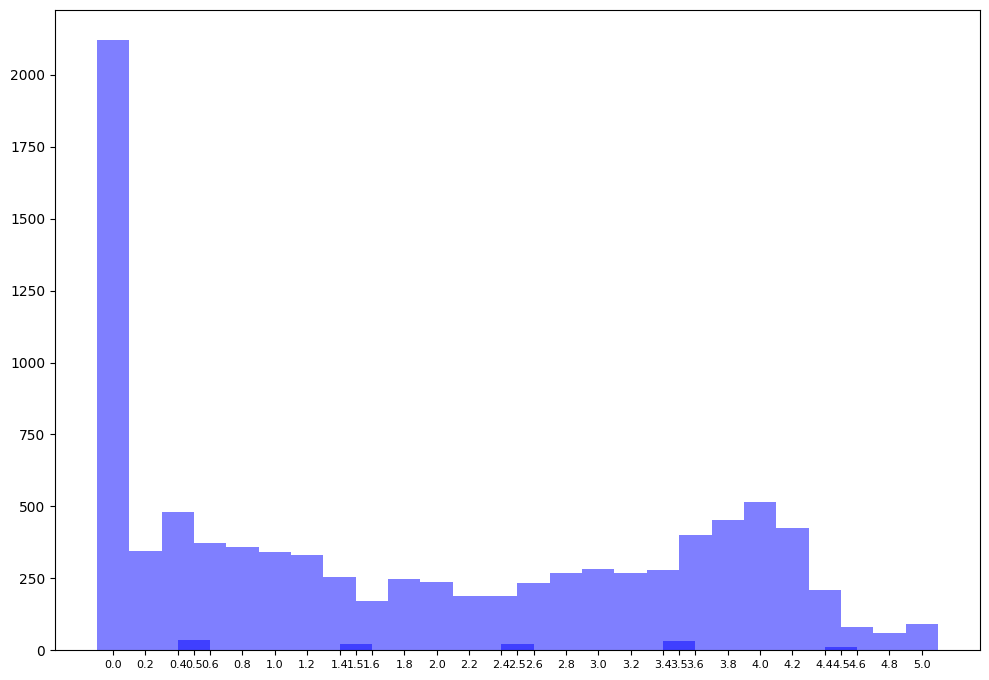

In [179]:
feature = train_pd['label']

plt.figure(figsize=(10,7.5))
#plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.2, color='b', alpha=0.5)
plt.xticks(temp.keys(), fontsize=8) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

# label == 0 :: 2119

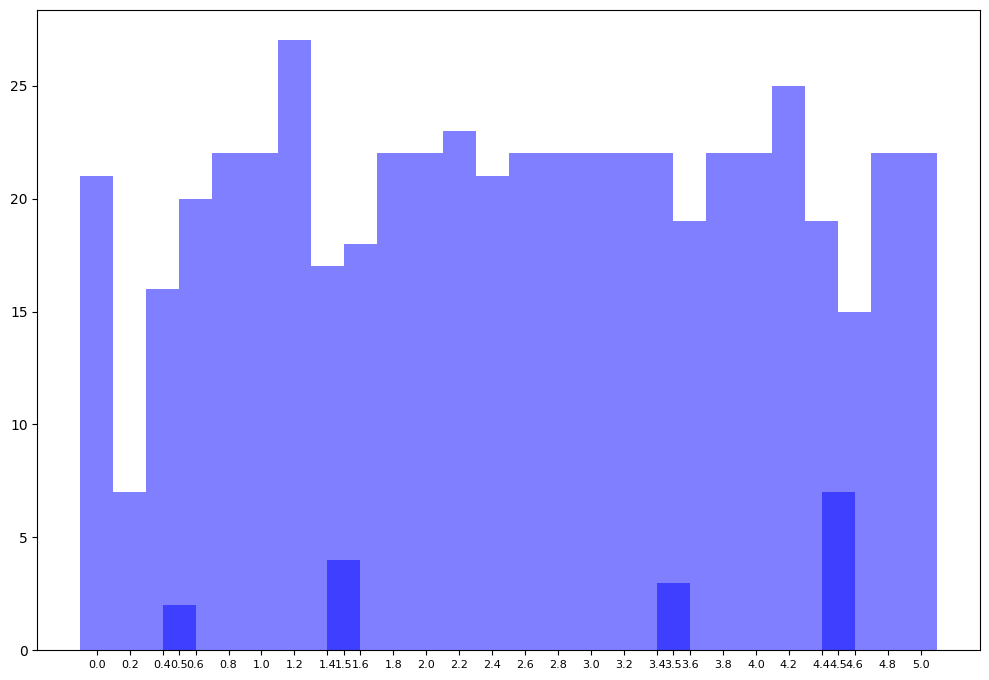

In [180]:
feature = dev_pd['label']

plt.figure(figsize=(10,7.5))
#plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.2, color='b', alpha=0.5)
plt.xticks(temp.keys(), fontsize=8) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

- Train,Dev,Tes데이터는 균일하고 랜던한 분포를 가져야함 :   
 dev데이터는 분포가 고른편, 하지만 train데이터는 0점에 쏠린 데이터   

### **1-2 : Source 분포**

([<matplotlib.patches.Wedge at 0x7ff3caa22850>,
 [Text(-0.7833015107170367, 0.7722944667083976, 'nsmc-sampled'),
  Text(-0.775980774956586, -0.7796498168394426, 'slack-rtt'),
  Text(0.6852590866774975, -0.8604766028927935, 'petition-sampled'),
  Text(1.0897742814501923, 0.14963961871682735, 'slack-sampled'),
  Text(0.793895228753955, 0.7614002664576008, 'nsmc-rtt'),
  Text(0.2886370396316437, 1.0614559149360285, 'petition-rtt')],
 [Text(-0.534069211852525, 0.526564409119362, '25.2%'),
  Text(-0.5290778011067632, -0.5315794205723472, '24.6%'),
  Text(0.46722210455283913, -0.58668859288145, '21.7%'),
  Text(0.7430279191705855, 0.10202701276147319, '11.2%'),
  Text(0.5412922014231512, 0.5191365453120005, '8.8%'),
  Text(0.1967979815670298, 0.7237199420018375, '8.5%')])

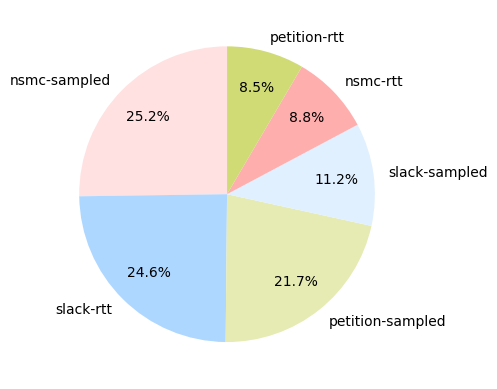

In [181]:
my_colours =['#ffe1e1','#aed7ff','#e5ebb2','#e1f0ff','#ffaeae','#d0db76']
plt.pie(train_pd['source'].value_counts(),labels=train_pd['source'].unique(),startangle=90,autopct='%.1f%%',pctdistance=0.75,colors = my_colours)

- NSMC (네이버 영화 감성 분석 코퍼스, Naver Sentiment Movie Corpus)
- slack (업스테이지(Upstage) 슬랙 데이터)
- petition (국민청원 게시판 제목 데이터)

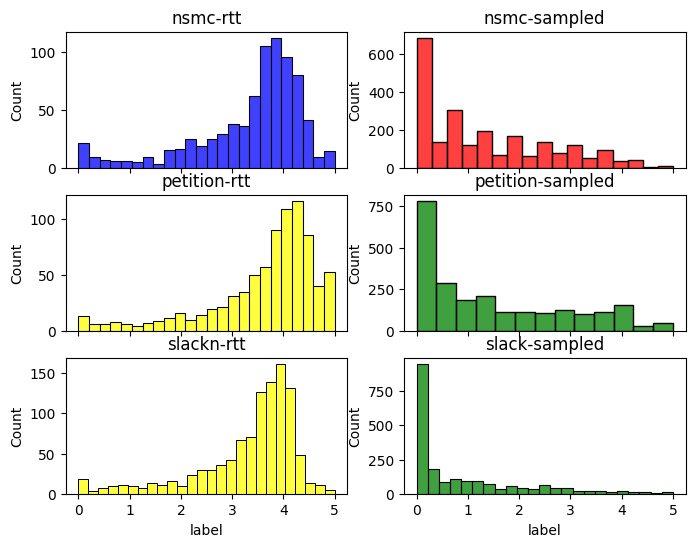

In [182]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_pd[train_pd['source']=='nsmc-rtt']['label'], color="blue", ax=axes[0, 0])
b = sns.histplot(train_pd[train_pd['source']=='nsmc-sampled']['label'], color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_pd[train_pd['source']=='petition-rtt']['label'], color="yellow", ax=axes[1, 0])
d = sns.histplot(train_pd[train_pd['source']=='petition-sampled']['label'], color="green", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_pd[train_pd['source']=='slack-rtt']['label'], color="yellow", ax=axes[2, 0])
f = sns.histplot(train_pd[train_pd['source']=='slack-sampled']['label'], color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

In [183]:
# my_colours =['#ffe1e1','#aed7ff','#e5ebb2','#e1f0ff','#ffaeae','#d0db76']
# plt.pie(dev_pd['source'].value_counts(),labels=train_pd['source'].unique(),startangle=90,autopct='%.1f%%',pctdistance=0.75,colors = my_colours)

## dev데이터 source의 비율은 train과 같음

In [184]:
# train_pd[train_pd['source']=='slack-sampled']

### **1-3 : binary-label 분포**

([<matplotlib.patches.Wedge at 0x7ff3cdc16950>,
 [Text(-1.0344203444877802, -0.3741317293544912, '0.0'),
  Text(1.0344203444877802, 0.37413172935449107, '1.0')],
 [Text(-0.7052865985143956, -0.25508981546897125, '61.0%'),
  Text(0.7052865985143956, 0.25508981546897114, '39.0%')])

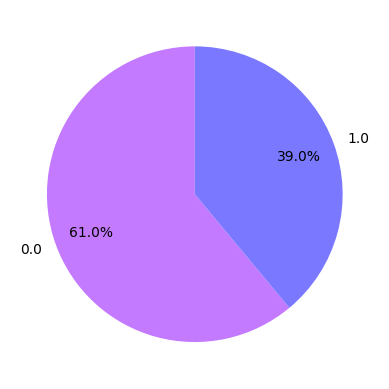

In [185]:
my_colours =['#c47aff','#7978ff']
plt.pie(train_pd['binary-label'].value_counts(),labels=train_pd['binary-label'].unique(),startangle=90,autopct='%.1f%%',pctdistance=0.75,colors = my_colours)

- ['binary-label']==0인 데이터 source 분포

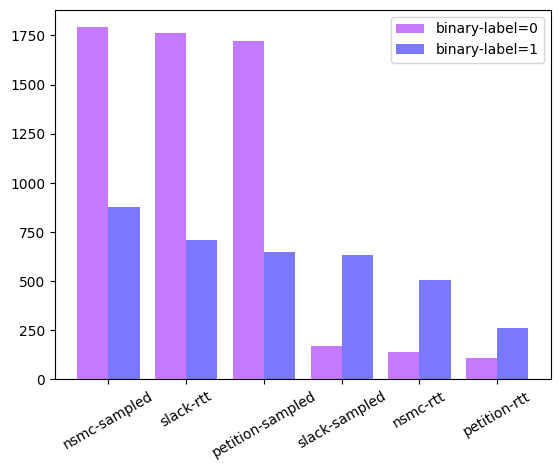

In [186]:
topics = train_pd['source'].unique()
value_a = train_pd[train_pd['binary-label']==0]['source'].value_counts()
value_b = train_pd[train_pd['binary-label']==1]['source'].value_counts()

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(2, 0.8, 1, 6)
value_b_x = create_x(2, 0.8, 2, 6)

ax = plt.subplot()
ax.bar(value_a_x, value_a,label ='binary-label=0',color = '#c47aff')
ax.bar(value_b_x, value_b,label ='binary-label=1',color = '#7978ff')
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(topics,rotation=30)
plt.legend(loc='upper right')
plt.show()

**중복데이터 확인**

In [187]:
train_pd[train_pd.duplicated('sentence_2',keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label
173,boostcamp-sts-v1-train-173,slack-rtt,다음에 다시 재밌는 이야기해요!,다음에 또 즐겁게 이야기합시다!,3.6,1.0
601,boostcamp-sts-v1-train-601,slack-rtt,다음에 또 뵈어요!,다음에 만나요!,4.0,1.0
4523,boostcamp-sts-v1-train-4523,petition-rtt,청소년보호법 폐지요,청소년보호법 폐지해주세요,4.0,1.0
4706,boostcamp-sts-v1-train-4706,petition-rtt,청소년 보호법 폐지 부탁드립니다,청소년보호법 폐지해주세요,4.2,1.0
6540,boostcamp-sts-v1-train-6540,slack-rtt,다음에 또 즐겁게 이야기 나누어요!,다음에 또 즐겁게 이야기합시다!,4.4,1.0
8520,boostcamp-sts-v1-train-8520,slack-rtt,다음에 꼭 뵈어요!,다음에 만나요!,3.4,1.0


### **1-4 : 문장 길이 확인**

In [188]:
max_len = np.max(train_pd['sentence_1'].str.len())
min_len = np.min(train_pd['sentence_1'].str.len())
mean_len = np.mean(train_pd['sentence_1'].str.len())

print('Max sentence_1 Length: ', max_len)
print('Min sentence_1 Length: ', min_len)
print('Mean sentence_1 Lenght: ', mean_len, '\n')

max_len = np.max(train_pd['sentence_2'].str.len())
min_len = np.min(train_pd['sentence_2'].str.len())
mean_len = np.mean(train_pd['sentence_2'].str.len())

print('Max sentence_2 Length: ', max_len)
print('Min sentence_2 Length: ', min_len)
print('Mean sentence_2 Lenght: ', mean_len)

Max sentence_1 Length:  98
Min sentence_1 Length:  9
Mean sentence_1 Lenght:  23.258151008151007 

Max sentence_2 Length:  114
Min sentence_2 Length:  5
Mean sentence_2 Lenght:  23.726404976404975


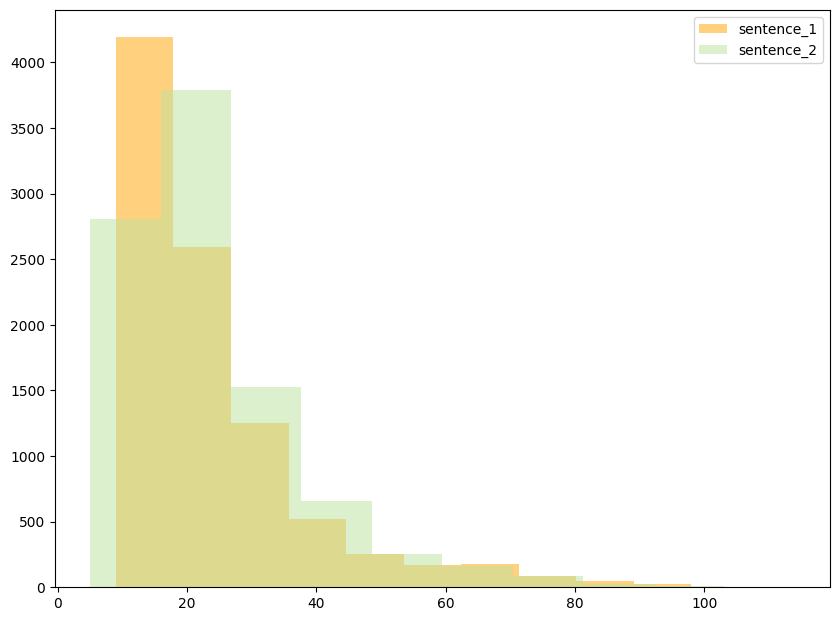

In [189]:
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.hist(train_pd['sentence_1'].str.len(), alpha=0.5, color='orange',label = 'sentence_1')
plt.hist(train_pd['sentence_2'].str.len(), alpha=0.5, color='#bce29e',label = 'sentence_2')
plt.legend()
#plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

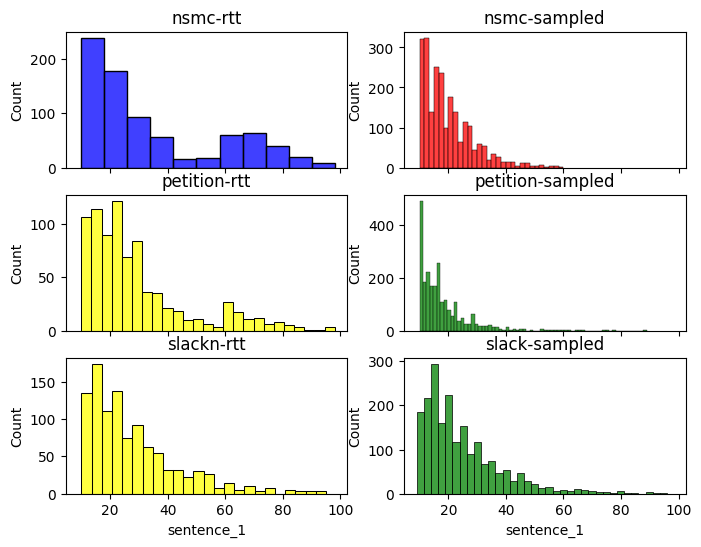

In [190]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_pd[train_pd['source']=='nsmc-rtt']['sentence_1'].str.len(), color="blue", ax=axes[0, 0])
b = sns.histplot(train_pd[train_pd['source']=='nsmc-sampled']['sentence_1'].str.len(), color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_pd[train_pd['source']=='petition-rtt']['sentence_1'].str.len(), color="yellow", ax=axes[1, 0])
d = sns.histplot(train_pd[train_pd['source']=='petition-sampled']['sentence_1'].str.len(), color="green", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_pd[train_pd['source']=='slack-rtt']['sentence_1'].str.len(), color="yellow", ax=axes[2, 0])
f = sns.histplot(train_pd[train_pd['source']=='slack-sampled']['sentence_1'].str.len(), color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

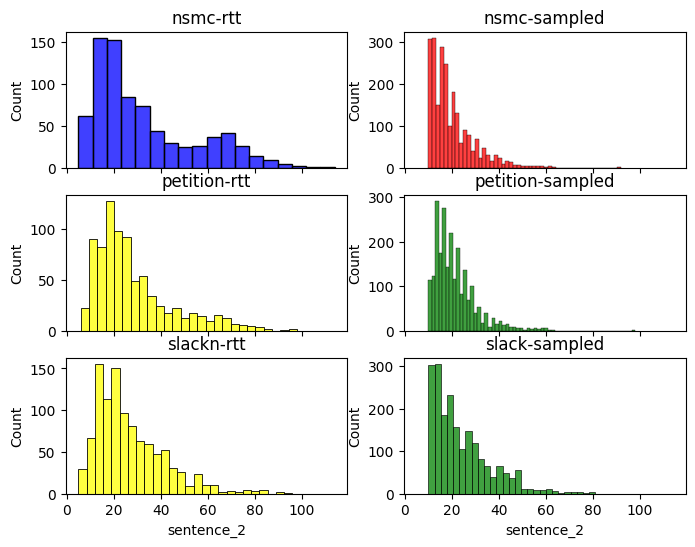

In [191]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_pd[train_pd['source']=='nsmc-rtt']['sentence_2'].str.len(), color="blue", ax=axes[0, 0])
b = sns.histplot(train_pd[train_pd['source']=='nsmc-sampled']['sentence_2'].str.len(), color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_pd[train_pd['source']=='petition-rtt']['sentence_2'].str.len(), color="yellow", ax=axes[1, 0])
d = sns.histplot(train_pd[train_pd['source']=='petition-sampled']['sentence_2'].str.len(), color="green", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_pd[train_pd['source']=='slack-rtt']['sentence_2'].str.len(), color="yellow", ax=axes[2, 0])
f = sns.histplot(train_pd[train_pd['source']=='slack-sampled']['sentence_2'].str.len(), color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

## **2:전처리**
- 띄어쓰기, 맞춤법 교정 > X
1. 한국어 이외의 문자 제거(이모지, 영어 etc) > pc방, LG전자 같은 단어도 제거됨 >> 불용어처리 사전? :: Try
2. 형태소 분석
- if)Source마다 전처리를 다르게 처리

### **2-1-1: 한글 이외 문자 제거**
- Min sentence_1 Length >> 0
- Max sentence_2 Length >> -8
- Min sentence_2 Length:  -3
- Mean Length >> -2
- 10~20구간(계급)에 몰림

In [192]:
train_re = train_pd.copy()
train_re['sentence_1'] = train_pd['sentence_1'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
train_re['sentence_2'] = train_pd['sentence_2'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')

/opt/ml/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/ml/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [193]:
max_len = np.max(train_re['sentence_1'].str.len())
min_len = np.min(train_re['sentence_1'].str.len())
mean_len = np.mean(train_re['sentence_1'].str.len())

print('Max sentence_1 Length: ', max_len)
print('Min sentence_1 Length: ', min_len)
print('Mean sentence_1 Lenght: ', mean_len, '\n')

max_len = np.max(train_re['sentence_2'].str.len())
min_len = np.min(train_re['sentence_2'].str.len())
mean_len = np.mean(train_re['sentence_2'].str.len())

print('Max sentence_2 Length: ', max_len)
print('Min sentence_2 Length: ', min_len)
print('Mean sentence_2 Lenght: ', mean_len)

Max sentence_1 Length:  98
Min sentence_1 Length:  0
Mean sentence_1 Lenght:  21.727262977262978 

Max sentence_2 Length:  106
Min sentence_2 Length:  2
Mean sentence_2 Lenght:  21.850493350493352


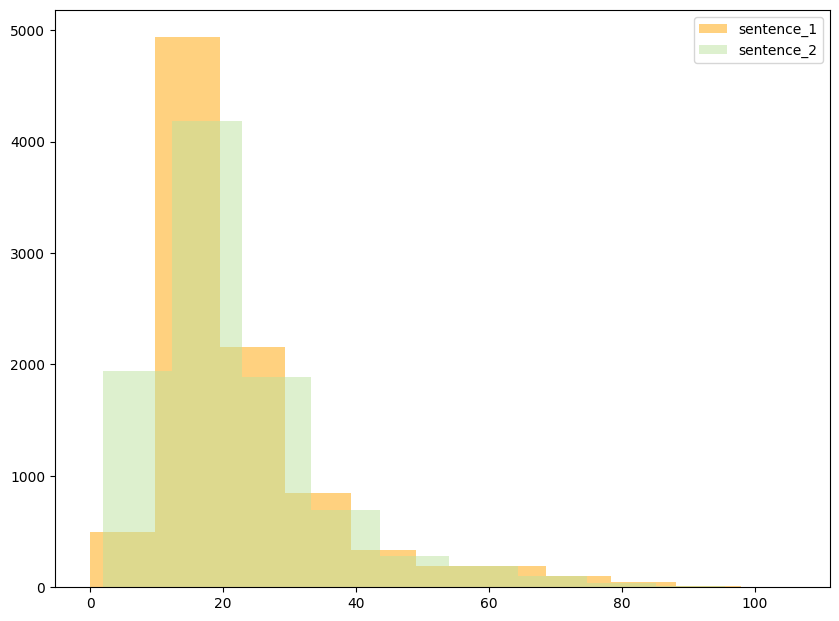

In [194]:
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.hist(train_re['sentence_1'].str.len(), alpha=0.5, color='orange',label = 'sentence_1')
plt.hist(train_re['sentence_2'].str.len(), alpha=0.5, color='#bce29e',label = 'sentence_2')
plt.legend()
#plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

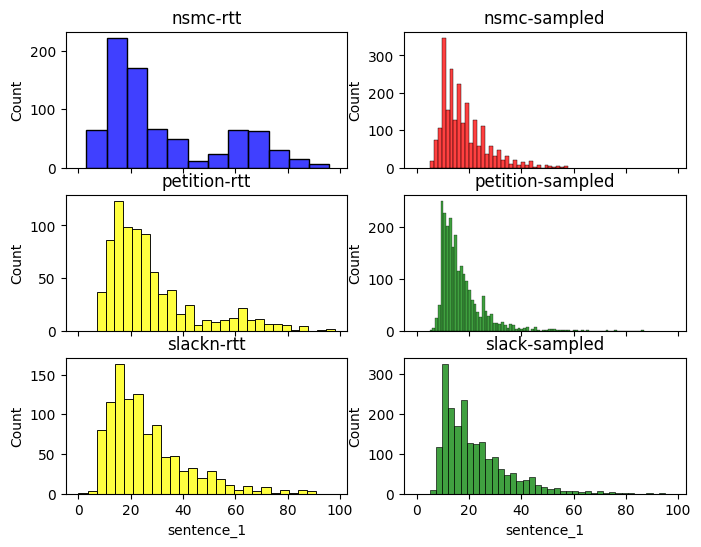

In [195]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_re[train_re['source']=='nsmc-rtt']['sentence_1'].str.len(), color="blue", ax=axes[0, 0])
b = sns.histplot(train_re[train_re['source']=='nsmc-sampled']['sentence_1'].str.len(), color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_re[train_re['source']=='petition-rtt']['sentence_1'].str.len(), color="yellow", ax=axes[1, 0])
d = sns.histplot(train_re[train_re['source']=='petition-sampled']['sentence_1'].str.len(), color="green", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_re[train_re['source']=='slack-rtt']['sentence_1'].str.len(), color="yellow", ax=axes[2, 0])
f = sns.histplot(train_re[train_re['source']=='slack-sampled']['sentence_1'].str.len(), color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

### **2-1-2: 확인하기**
- sentence_1 : 176 row(479 row)
- sentence_2 : 150 row(453 row)
- both : 303 row

In [196]:
test = train_pd[train_pd.sentence_1.str.contains('[a-zA-Z]')][train_pd.sentence_2.str.contains('[a-zA-Z]')]
#test[test['binary-label']==1]
test

/opt/ml/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,source,sentence_1,sentence_2,label,binary-label
15,boostcamp-sts-v1-train-015,petition-sampled,LG전자 스마트폰 생산 중단 청원,LG전자서비스의 노조 와해를 조사해주세요.,0.4,0.0
65,boostcamp-sts-v1-train-065,slack-sampled,아 어제 <PERSON> 님이 사오신거!,"누가? 저랑 <PERSON>, 그리고 경주에 가까이 사시는 분이든 서울에 사시는 분...",0.4,0.0
70,boostcamp-sts-v1-train-070,slack-sampled,<PERSON> 님과 어제 저녁에 식사를 하였습니다!,<PERSON> 님과 어제 한시간동안 이야기 나눴습니다!!,0.8,0.0
72,boostcamp-sts-v1-train-072,slack-sampled,구글 meet에 맞는 사이즈로 리사이즈했습니다,스우파 리정 vs 시미즈에서 리정 배틀곡이기도합니다,0.0,0.0
110,boostcamp-sts-v1-train-110,nsmc-rtt,한국의 '귀신이 산다'나 '시실리ㅇkm'가 완성도 높다.,한국의 '귀신이 산다'와 '시칠리아 ㅇkm'는 완성도가 높다.,3.8,1.0
...,...,...,...,...,...,...
9203,boostcamp-sts-v1-train-9203,petition-sampled,사당동pc방살인사건,강서구 pc방 살인사건...,1.2,0.0
9205,boostcamp-sts-v1-train-9205,slack-sampled,<PERSON> 의 날개뼈가 시원해집니다.,<PERSON> 의 흉쇄유돌근이 시원해집니다.,3.2,1.0
9259,boostcamp-sts-v1-train-9259,nsmc-rtt,내 평생 최악의 드라마 첫화에서 배가 터지는 씬이 나오는데 그허접 한 cg를 보며 ...,"내 인생 최악의 드라마 1화에서 배가 터지는 장면이 있는데, 그 엉터리 CG를 보고...",3.8,1.0
9275,boostcamp-sts-v1-train-9275,slack-rtt,<PERSON> 님 스마트홈 구축은 어떻게 되고 계시나요.,<PERSON> 스마트홈 구축은 어떻게 진행되고 있나요?,4.2,1.0


- \<PERSON\>은 개인신상정보로 추정됨
- pc방, LG전자 같은 단어도 제거됨 >> 불용어처리 사전?

In [197]:
# train_re.iloc[test.index][train_re['binary-label']==1]
train_re.loc[test.index]

,id,source,sentence_1,sentence_2,label,binary-label
15,boostcamp-sts-v1-train-015,petition-sampled,전자 스마트폰 생산 중단 청원,전자서비스의 노조 와해를 조사해주세요,0.4,0.0
65,boostcamp-sts-v1-train-065,slack-sampled,아 어제 님이 사오신거,누가 저랑 그리고 경주에 가까이 사시는 분이든 서울에 사시는 분이든 놀 준비 되있...,0.4,0.0
70,boostcamp-sts-v1-train-070,slack-sampled,님과 어제 저녁에 식사를 하였습니다,님과 어제 한시간동안 이야기 나눴습니다,0.8,0.0
72,boostcamp-sts-v1-train-072,slack-sampled,구글 에 맞는 사이즈로 리사이즈했습니다,스우파 리정 시미즈에서 리정 배틀곡이기도합니다,0.0,0.0
110,boostcamp-sts-v1-train-110,nsmc-rtt,한국의 귀신이 산다나 시실리ㅇ가 완성도 높다,한국의 귀신이 산다와 시칠리아 ㅇ는 완성도가 높다,3.8,1.0
...,...,...,...,...,...,...
9203,boostcamp-sts-v1-train-9203,petition-sampled,사당동방살인사건,강서구 방 살인사건,1.2,0.0
9205,boostcamp-sts-v1-train-9205,slack-sampled,의 날개뼈가 시원해집니다,의 흉쇄유돌근이 시원해집니다,3.2,1.0
9259,boostcamp-sts-v1-train-9259,nsmc-rtt,내 평생 최악의 드라마 첫화에서 배가 터지는 씬이 나오는데 그허접 한 를 보며 쌍욕...,내 인생 최악의 드라마 1화에서 배가 터지는 장면이 있는데 그 엉터리 를 보고 욕했...,3.8,1.0
9275,boostcamp-sts-v1-train-9275,slack-rtt,님 스마트홈 구축은 어떻게 되고 계시나요,스마트홈 구축은 어떻게 진행되고 있나요,4.2,1.0


In [198]:
train_pd.loc[1613]

id              boostcamp-sts-v1-train-1613
source                            slack-rtt
sentence_1                       destiny..?
sentence_2                            운명..?
label                                   4.6
binary-label                            1.0
Name: 1613, dtype: object

### **2-2: 형태소 분석**
- if)명사, 동사 위주의 형태소 분석 : https://github.com/honeybeat1/klue-sts
- selfT)사용하려는 모델의 토크나이저를 사용하는 게 효율이 좋지않나?

1. 형태소 분석기를 통해 명사, 동사(+형용사) 품사만 남기고
2. 품사 원형으로 복원   
https://ebbnflow.tistory.com/246

유의미한 인사이트를 도출할 수 있을까? : if) 품사의 조합으로 label과 상관관계가 있는지 확인하기